In [3]:
import pandas as pd


In [2]:
car_sales = pd.read_csv(r'/Users/abhishekchauhan/Learnings/Machine-learning-course/Data/car-sales-extended-missing-data.csv')

In [3]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
# Split the data in the X and Y

from sklearn.model_selection import train_test_split

x = car_sales.drop('Price',axis=1)
y = car_sales['Price']


In [5]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [6]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [7]:
# Building the machine learning model after converting the text label to the number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [8]:

# Turning the categorical data to Numbers

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
    "one_hot",
    one_hot,
    categorical_features)],
    remainder='passthrough'
)

transformer_X = transformer.fit_transform(x).toarray()
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 16))

In [9]:
# Lets check the data
df = pd.DataFrame(transformer_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0


In [10]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [11]:
# Lets train the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

x_train,x_test,y_train,y_test = train_test_split(transformer_X,y,test_size = 0.2)

model.fit(x_train,y_train)

model.score(x_test,y_test)

ValueError: Input y contains NaN.

# Looks like we have some missing values.

Lets fix those values

In [12]:
# Lets fix find the missing values 
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
# Lets fix the values using the pandas.

car_sales['Make'].fillna('Blank',inplace=True)
car_sales['Colour'].fillna('Blank',inplace=True)
car_sales['Doors'].fillna('Blank',inplace=True)
car_sales['Odometer (KM)'].fillna(car_sales['Odometer (KM)'].mean(),inplace=True)

/var/folders/zq/6tyr5bd55nz5m1lxswhltzl00000gn/T/ipykernel_84373/4256552856.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales['Make'].fillna('Blank',inplace=True)
/var/folders/zq/6tyr5bd55nz5m1lxswhltzl00000gn/T/ipykernel_84373/4256552856.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [14]:
car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

Price is the target which we want to predict so it will be not good if, we fill this column. Lets remove blanks

In [15]:
car_sales = car_sales[~(car_sales['Price'].isna())]

In [16]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [17]:
# lets split the data again
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].astype(int)
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']


/var/folders/zq/6tyr5bd55nz5m1lxswhltzl00000gn/T/ipykernel_84373/4284028339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].astype(int)


In [18]:
# COnverting the categorical data to the numeric data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features = ['Make','Colour','Doors']
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformer_X = transformer.fit_transform(x).toarray()
print(pd.DataFrame(transformer_X))




TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
x.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors            object
dtype: object

## Option 2: Filling missing values with the sklearn.

In [19]:
car_missing_missing = pd.read_csv('/Users/abhishekchauhan/Learnings/Machine-learning-course/Data/car-sales-extended-missing-data.csv')


In [21]:
car_missing_missing['Doors'].dtype

dtype('float64')

lets check for the missing values

In [22]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [23]:
# Lets drop the missing values in the price column because it is the target coloum for us.
car_missing_missing.dropna(subset='Price',inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [24]:
# Spliting the data in X and Y
x = car_missing_missing.drop(columns='Price',axis=1)
y = car_missing_missing['Price']


In [25]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [26]:
#lets do the filling part
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [27]:
# Filling the missing values with the missing and numerical.
cat_impute = SimpleImputer(strategy='constant',fill_value= 'missing')
door_impute = SimpleImputer(strategy='most_frequent',fill_value= '4.0')
num_imputer = SimpleImputer(strategy='mean')

In [28]:
# defining columns for column trasformer

cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

In [29]:
# creating the imputer that fill the values

imputer = ColumnTransformer([('cat_imputer',cat_impute,cat_features),
                             ('door_impute',door_impute,door_features),
                            ('num_imputer',num_imputer,num_features)])

In [30]:
# transform the data.
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [31]:
#lets check the missing values in the new dataframe
car_sales_filled = pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.isna().sum()
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [32]:
# Lets again convert the categorical values in the numerical.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
categorical_features = ['Make','Colour','Doors']

transformer = ColumnTransformer([
    ('one_hot',one_hot,categorical_features)
],remainder='passthrough'
)

transformer_X = transformer.fit_transform(car_sales_filled)
transformer_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [33]:
# Now we have the data in the form of numbers 
#Lets train the data

import numpy as np
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(transformer_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## picking a machine learning model for regression problem

In [35]:
# Get the california dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [36]:
# Lets create a Data Frame form this.
housing_df = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [37]:
# Sexy Now we need to add the target column.

housing_df['MedHouseVal'] = housing['target']

In [38]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
# Lets rename the target column here.
housing_df.rename(columns={'MedHouseVal':'target'},inplace=True)

In [40]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
#Lets move forward with the model I have used SKLearn cheet-sheet for selecting this model

# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setups random seed
np.random.seed(42)

# create the date
X = housing_df.drop('target',axis=1)
Y = housing_df['target']

# Split the data in the train and test sets
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X,Y,test_size=0.2)


# Intantiate and fit the model (on the training set)

model = Ridge()
model.fit(X1_train,Y1_train)

# Checking for the results

model.score(X1_test,Y1_test)

0.5758549611440125

In [42]:
# lets use the Random forest for the better understanding

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# fixing the state
np.random.seed(42)

# creating the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# spliting the data in the train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# model initializing 
model = RandomForestRegressor()

# model fit
model.fit(x_train,y_train)

# model Score
model.score(x_test,y_test)

0.8059809073051385

In [9]:
# Choosing an estimator for a classification problem

heart_disease = pd.read_csv('/Users/abhishekchauhan/Learnings/Machine-learning-course/Data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
# setting up the random seed
np.random.seed(42)

# import the LinearSVC model
from sklearn.svm import LinearSVC

# creating the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# spliting the data in the train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#initiate the model
clf = LinearSVC()

# fit the data
clf.fit(x_train,y_train)

# checking the Score of the model
clf.score(x_test,y_test)


0.8688524590163934

In [45]:
# lets try with the other methods
# setting up the random seed
np.random.seed(42)

# import the LinearSVC model
from sklearn.ensemble import RandomForestClassifier

# creating the data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# spliting the data in the train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#initiate the model
clf = RandomForestClassifier()

# fit the data
clf.fit(x_train,y_train)

# checking the Score of the model
clf.score(x_test,y_test)


0.8524590163934426

In [46]:
# predict vs predict_proba

y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [47]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [48]:
np.mean(y_pred == y_test)

np.float64(0.8524590163934426)

as you see this is the same there is one more way to this using the sklearn.

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

In [50]:
# predict vs predict_proba

clf.predict_proba(x_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [51]:
clf.predict(x_train[:5])

array([1, 0, 0, 1, 0])

In [52]:
# Lets predict the housing price with the help of the regressor "RandomForest regressor"

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
# import the model
from sklearn.ensemble import RandomForestRegressor

# fix the values/state
np.random.seed(42)
# creating the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# split the data in the train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# initiate the model
model = RandomForestRegressor()

# fit the model
model.fit(x_train,y_train)

# predict the model
y_pred = model.predict(x_test)

In [54]:
result = np.mean(y_pred - y_test)

In [55]:
result

np.float64(0.011913192441860052)

In [56]:
# Now lets do it with the sklearn
from sklearn.metrics import mean_absolute_error
result = mean_absolute_error(y_pred,y_test)
result

0.3270458119670544

Evaluating model with the `Score` method.

In [57]:
#importing the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# fix the state of the model
np.random.seed(42)

# create the data set X and Y
X = heart_disease.drop('target',axis=1)
Y = heart_disease['target']

# Split data in test and train.
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# Classifier model instance 
clf = RandomForestClassifier()

# Fit the classification model

clf.fit(x_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
# Lets check the score of the model
clf.score(x_train,y_train)

1.0

Look we get this 100% score because our model is already familier with the training data now lets check for the test data

In [59]:
clf.score(x_test,y_test)

0.8524590163934426

So the score is decreased to the 85% which means we must never expose the test data to model.

In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# Split the data in the train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create the instance of the model
model = RandomForestRegressor(n_estimators=10)

# fit the model
model.fit(x_train,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
model.score(x_test,y_test)

0.7851752292818259

## cross-validation in machine learning

In [6]:
# import the libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

# create the data

x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create instance of the model
clf = RandomForestClassifier()

# using the cross_val_score
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

# lets get the mean here

In [8]:
np.random.seed(42)
cross_val_score_mean = np.mean(cross_val_score(clf,x,y,cv=5))
cross_val_score_mean

np.float64(0.8248087431693989)

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area Under ROC Curve
3. Confussion metrics
4. Classification metrix

In [12]:
# Accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# fix the random state
np.random.seed(42)

# divide the data (x,y)
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# create instance of the model
clf = RandomForestClassifier(n_estimators=100)

# checking the cross validation score 
cross_validation_score_var = cross_val_score(clf,x,y,cv=5)

# Checking the mean performance
print(f'Heart disease accuracy {np.mean(cross_validation_score_var) * 100:.2f}%')

Heart disease accuracy 82.48%


# ROC curve

In [ ]:
# import libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

# lets create the data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

# lets fit the model 
clf.fit(x_train,y_train)

# Lets pridict the model

y_probas = clf.predict_proba(x_test) # output [0.55,0.45] means [chances of 0, chances of 1]

y_probas[:10] # checking only 10




array([[0.69, 0.31],
       [0.58, 0.42],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.28, 0.72],
       [0.9 , 0.1 ],
       [0.39, 0.61],
       [0.11, 0.89]])

In [16]:
y_probas_positive = y_probas[:,1]
y_probas_positive[:10]

array([0.31, 0.42, 0.08, 0.92, 0.93, 0.97, 0.72, 0.1 , 0.61, 0.89])

In [17]:
# calculate fpr, tpr and thresholds
fpr,tpr, thresold = roc_curve(y_test,y_probas_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03703704, 0.03703704,
       0.07407407, 0.07407407, 0.11111111, 0.11111111, 0.14814815,
       0.14814815, 0.22222222, 0.2962963 , 0.2962963 , 0.33333333,
       0.33333333, 0.48148148, 0.48148148, 0.59259259, 0.7037037 ,
       0.81481481, 0.85185185, 0.92592593, 1.        ])

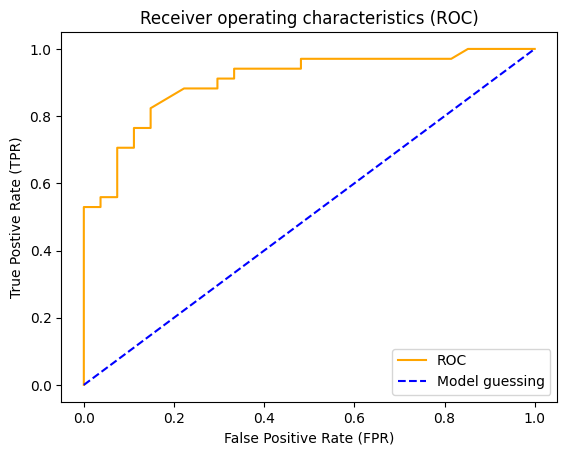

In [22]:
# Creating the function for plotting the ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(TPR,FPR):
    """
    Plot a ROC curve given the false positive rate and the true positive rate
    """

    # Plot the ROC curve
    plt.plot(FPR,TPR,color='orange',label='ROC')

    # plot the model guessing 
    plt.plot([0,1],[0,1],label='Model guessing',color='Blue',linestyle='--')

    # customize the plot
    plt.ylabel('True Postive Rate (TPR)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.title("Receiver operating characteristics (ROC)")
    plt.legend()
    plt.show()

plot_roc_curve(tpr,fpr)

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probas_positive)

0.9046840958605664